# Etapa de extração e padronização das bases

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from os import listdir
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

In [2]:
# Criação da função para compararmos as bases

def comparar_colunas(dfi,dff):
  for coluna_i in dfi.columns:
    if coluna_i not in dff.columns:
      print(f'#1: {coluna_i}')

  for coluna_f in dff.columns:
    if coluna_f not in dfi.columns:
      print(f'#2: {coluna_f}')


In [3]:
# Importação dos CSVs separados
df1 = pd.read_csv('/content/drive/MyDrive/DataSets/Happiness/2015.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DataSets/Happiness/2016.csv')
df3 = pd.read_csv('/content/drive/MyDrive/DataSets/Happiness/2017.csv')
df4 = pd.read_csv('/content/drive/MyDrive/DataSets/Happiness/2018.csv')
df5 = pd.read_csv('/content/drive/MyDrive/DataSets/Happiness/2019.csv')

In [4]:
#Adição de colunas de ano
df1['Ano'] = 2015
df2['Ano'] = 2016
df3['Ano'] = 2017
df4['Ano'] = 2018
df5['Ano'] = 2019

In [5]:
# Comparar df1 e df2

comparar_colunas(df1,df2)

#1: Standard Error
#2: Lower Confidence Interval
#2: Upper Confidence Interval


In [6]:
# Tornando a quantidade de ambas colunas iguais
df1.drop('Standard Error', axis=1, inplace=True)
df2.drop(['Lower Confidence Interval', 'Upper Confidence Interval'], axis=1, inplace=True)

In [7]:
# Juntando ambos
df = pd.concat([df1,df2])

In [8]:
df3.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Ano'],
      dtype='object')

In [9]:
# Tratamento de nomes de coluna
lista_col = [x.replace('.',' ') for x in df3.columns] # substituir os pontos por espaço
lista_col = [x.replace('  ',' ') for x in lista_col] # onde tinha dois pontos, substituir por um espaço só
nova_lista = [i if i[-1] != ' ' else i[:-1] for i in lista_col] # trimando os dados manualmente

df3.columns = nova_lista # Setando as colunas do df3 para os nomes normalizados

In [10]:
df3.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Whisker high',
       'Whisker low', 'Economy GDP per Capita', 'Family',
       'Health Life Expectancy', 'Freedom', 'Generosity',
       'Trust Government Corruption', 'Dystopia Residual', 'Ano'],
      dtype='object')

In [11]:
# Comparando df com df3
comparar_colunas(df, df3)

#1: Region
#1: Economy (GDP per Capita)
#1: Health (Life Expectancy)
#1: Trust (Government Corruption)
#2: Whisker high
#2: Whisker low
#2: Economy GDP per Capita
#2: Health Life Expectancy
#2: Trust Government Corruption


In [12]:
# Normalizando as colunas e renomeando
df3.rename({'Economy GDP per Capita':'Economy (GDP per Capita)', 'Health Life Expectancy':'Health (Life Expectancy)', 'Trust Government Corruption':'Trust (Government Corruption)'}, axis=1, inplace=True)

In [13]:
df3.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Whisker high',
       'Whisker low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual', 'Ano'],
      dtype='object')

In [14]:
# Validação
comparar_colunas(df,df3)

#1: Region
#2: Whisker high
#2: Whisker low


In [15]:
# Deletar colunas a mais
df.drop('Region', axis=1, inplace=True)
df3.drop(['Whisker high', 'Whisker low'], axis=1, inplace=True)

In [16]:
# Juntando df com df3
df = pd.concat([df,df3])

In [17]:
# Comparando df com df4
comparar_colunas(df,df4)

#1: Country
#1: Happiness Rank
#1: Happiness Score
#1: Economy (GDP per Capita)
#1: Family
#1: Health (Life Expectancy)
#1: Freedom
#1: Trust (Government Corruption)
#1: Dystopia Residual
#2: Overall rank
#2: Country or region
#2: Score
#2: GDP per capita
#2: Social support
#2: Healthy life expectancy
#2: Freedom to make life choices
#2: Perceptions of corruption


In [18]:
# remover Happiness Rank do df, remover Dystopia Residual do df, remover Overall rank do df4
# renomear no df4 --> Country or region : Country, Score : Happiness Score, GDP per capita : Economy (GDP per Capita), Social support : Family, Healthy life expectancy : Health (Life Expectancy), Freedom to make life choices : Freedom, Perceptions of corruption : Trust (Government Corruption)

df.drop(['Happiness Rank', 'Dystopia Residual'], axis = 1, inplace=True)
df4.drop('Overall rank', axis=1, inplace=True)

df4.rename({'Country or region' : 'Country', 'Score' : 'Happiness Score', 'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family', 'Healthy life expectancy' : 'Health (Life Expectancy)', 'Freedom to make life choices' : 'Freedom', 'Perceptions of corruption' : 'Trust (Government Corruption)'}, axis=1, inplace=True)

In [19]:
# Validação
comparar_colunas(df, df4)

In [20]:
# Juntar df com df4
df = pd.concat([df, df4])

In [21]:
# Comparar colunas
comparar_colunas(df,df5)

#1: Country
#1: Happiness Score
#1: Economy (GDP per Capita)
#1: Family
#1: Health (Life Expectancy)
#1: Freedom
#1: Trust (Government Corruption)
#2: Overall rank
#2: Country or region
#2: Score
#2: GDP per capita
#2: Social support
#2: Healthy life expectancy
#2: Freedom to make life choices
#2: Perceptions of corruption


In [22]:
# A estrutura colunar do df5 é igual ao df4, então basta aplicarmos os métodos já feitos acima
df5.drop('Overall rank', axis=1, inplace=True)

df5.rename({'Country or region' : 'Country', 'Score' : 'Happiness Score', 'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family', 'Healthy life expectancy' : 'Health (Life Expectancy)', 'Freedom to make life choices' : 'Freedom', 'Perceptions of corruption' : 'Trust (Government Corruption)'}, axis=1, inplace=True)

In [23]:
# Validação
comparar_colunas(df, df5)

In [24]:
# Juntar df e a finalização da etapa de concatenação de bases
df = pd.concat([df, df5])

In [25]:
# Criando CSV da base tratada
df.to_csv('/content/drive/MyDrive/DataSets/Happiness/DataMerged.csv', index=False)

# Análise exploratória de dados

## Estrutura do dataset

In [26]:
# Ler CSV tratado
df = pd.read_csv('/content/drive/MyDrive/DataSets/Happiness/DataMerged.csv')

In [27]:
df.head(5)

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Ano
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [28]:
# Verificando características do conjunto de dados
df.shape

(782, 9)

In [29]:
# Verificando tipo de dados
df.dtypes

Country                           object
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Ano                                int64
dtype: object

## Tratamento de nulos

In [30]:
# Contando e agregando dados nulos
df.isna().sum()

Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
Ano                              0
dtype: int64

In [31]:
# Localizando linha de valor nulo
df.loc[df['Trust (Government Corruption)'].isnull() == True]

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Ano
489,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,NaN,0.186,2018


In [32]:
# Substituição de valor nulo para a média geral
df['Trust (Government Corruption)'].fillna(df['Trust (Government Corruption)'].mean(), inplace=True)

In [33]:
# Validação
df.isna().sum()

Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Ano                              0
dtype: int64

In [34]:
df_float = df.iloc[:,1:8]

<Axes: >

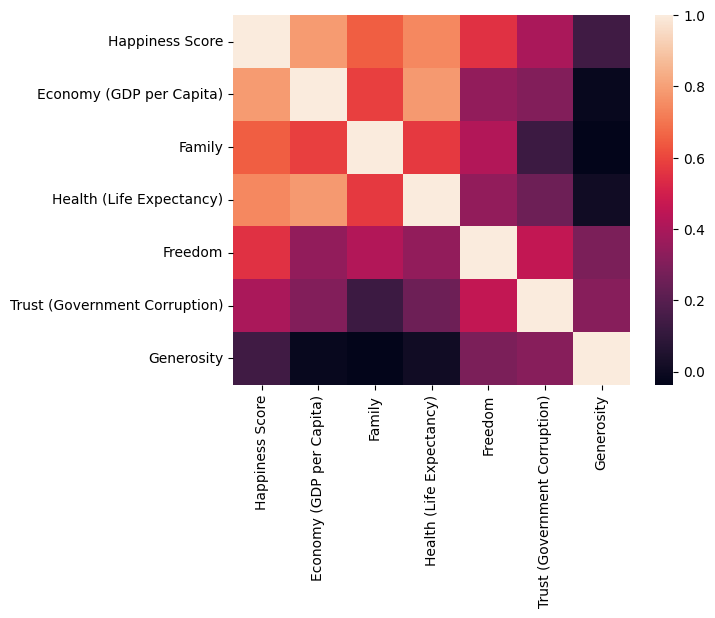

In [35]:
sns.heatmap(df_float.corr())

## Análise de variáveis

In [36]:
# Descrevendo as variáveis

df.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Ano
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576,2016.993606
std,1.127456,0.407340,0.329548,0.248309,0.152880,0.105749,0.122321,1.417364
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.509750,0.606500,0.869363,0.440183,0.309768,0.054250,0.130000,2016.000000
50%,5.322000,0.982205,1.124735,0.647310,0.431000,0.091033,0.201982,2017.000000
75%,6.189500,1.236187,1.327250,0.808000,0.531000,0.155861,0.278832,2018.000000
max,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,2019.000000


### Happiness Score: índice de felicidade da população medido na escala entre 0 a 10

Text(0.5, 1.0, 'Distribuição da variável Happiness Score ')

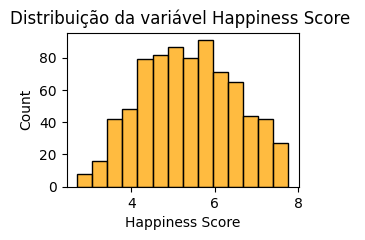

In [37]:
plt.figure(figsize=(3,2))
sns.histplot(df, x='Happiness Score', color='orange')
plt.title('Distribuição da variável Happiness Score ')

### Economy (GDP per Capita) : Variável que representa o PIB per capta do país

In [38]:
df['Economy (GDP per Capita)'].value_counts()

Economy (GDP per Capita)
0.00000    5
0.96000    4
0.33200    3
1.34000    3
1.00400    2
          ..
1.01930    1
0.74037    1
0.25558    1
0.97724    1
0.30600    1
Name: count, Length: 742, dtype: int64

In [39]:
# É impossível existir país cujo PIB é zero. Devemos tratar estes valores

pib = df.loc[df['Economy (GDP per Capita)'] != 0]

In [40]:
pib['Economy (GDP per Capita)'].value_counts()

Economy (GDP per Capita)
0.96000    4
0.33200    3
1.34000    3
1.00400    2
0.80700    2
          ..
1.01930    1
0.74037    1
0.25558    1
0.97724    1
0.30600    1
Name: count, Length: 741, dtype: int64

Text(0.5, 1.0, 'Distribuição da variável Economy (GDP per Capita)')

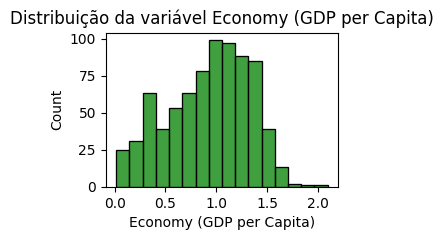

In [41]:
plt.figure(figsize=(3,2))
sns.histplot(pib, x='Economy (GDP per Capita)', color='green')
plt.title('Distribuição da variável Economy (GDP per Capita)')

###Family: Índice de bons laços familiares

In [42]:
df['Family'].value_counts()

Family
0.00000    5
1.46500    3
1.53800    3
1.41000    3
1.50400    3
          ..
0.38595    1
0.93164    1
0.26135    1
0.64184    1
0.57500    1
Name: count, Length: 732, dtype: int64

In [43]:
fam = df.loc[df['Family'] != 0]

Text(0.5, 1.0, 'Distribuição da variável Family')

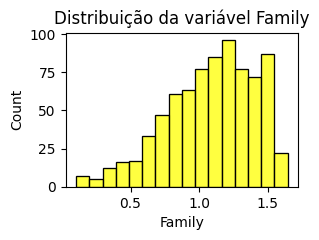

In [44]:
plt.figure(figsize=(3,2))
sns.histplot(fam, x='Family', color='yellow')
plt.title('Distribuição da variável Family')

###Health (Life Expectancy): Expectativa de vida

In [45]:
df['Health (Life Expectancy)'].value_counts()


Health (Life Expectancy)
0.00000    5
0.99900    5
0.81500    5
0.82800    4
0.87400    4
          ..
0.47036    1
0.73561    1
0.49759    1
0.55449    1
0.10500    1
Name: count, Length: 705, dtype: int64

In [46]:
exp = df.loc[df['Health (Life Expectancy)'] > 0]

Text(0.5, 1.0, 'Distribuição da variável Health (Life Expectancy)')

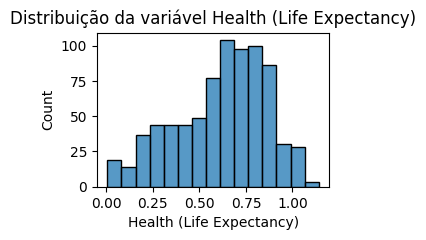

In [47]:
plt.figure(figsize=(3,2))
sns.histplot(exp, x='Health (Life Expectancy)')
plt.title('Distribuição da variável Health (Life Expectancy)')

###Freedom: índice de liberdade para fazer escolhas, variando de 0 a 1

In [48]:
df['Freedom'].value_counts()
free = df.loc[df['Freedom'] > 0]

Text(0.5, 1.0, 'Distribuição da variável Freedom')

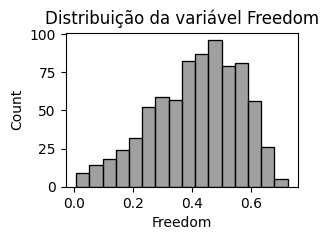

In [49]:
plt.figure(figsize=(3,2))
sns.histplot(free, x='Freedom', color='grey')
plt.title('Distribuição da variável Freedom')

###Trust (Government Corruption): índice de confiabilidade em relação à corrupção

In [50]:
df['Trust (Government Corruption)'].value_counts()
trust = df.loc[df['Trust (Government Corruption)'] > 0]

Text(0.5, 1.0, 'Distribuição da variável Trust (Government Corruption)')

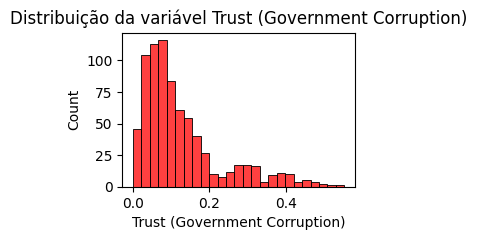

In [51]:
plt.figure(figsize=(3,2))
sns.histplot(trust, x='Trust (Government Corruption)', color='red')
plt.title('Distribuição da variável Trust (Government Corruption)')

###Generosity: índice de doações para a caridade no último mês

In [52]:
df['Generosity'].value_counts()

Generosity
0.17500    6
0.15300    5
0.18700    5
0.00000    5
0.09900    4
          ..
0.22567    1
0.36951    1
0.17087    1
0.17445    1
0.27600    1
Name: count, Length: 664, dtype: int64

In [53]:
gen = df.loc[df['Generosity']>0]

Text(0.5, 1.0, 'Distribuição da variável Generosity')

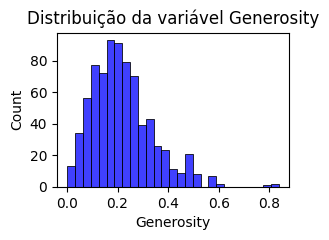

In [54]:
plt.figure(figsize=(3,2))
sns.histplot(gen, x='Generosity', color='blue')
plt.title('Distribuição da variável Generosity')


#Desenvolvimento dos modelos de Machine Learning

##Pré-processamento

In [55]:
# A primeira etapa é transformar as variáveis categóricas em variáveis dummy

df_c = set(df['Country']) # Para puxar somente a lista dos valores únicos
df_c = list(df_c) # Reconvertendo para lista

In [56]:
len(df_c)

170

In [57]:
df_c = pd.DataFrame(df_c, columns=['Country']) #Recriando o df com base na lista única de países

In [58]:
df_c.sort_values('Country', inplace=True) # Ordenando em ordem alfabética

In [59]:
df_c.reset_index(inplace=True) # Resetando o índice com a nova ordem

In [60]:
df_c.drop('index', axis=1, inplace=True) # Removendo o índice antigo

In [61]:
df_c['Country Code'] = df_c.index + 1 # Criando a chave primária desse df a partir da ordem dos países

In [62]:
df_merge = pd.merge(df, df_c, how='inner', on='Country') # Unindo o df com o df_c com a coluna em comum Country

In [63]:
df_merge_copy = df_merge.copy() #Backup

In [64]:
df_merge.drop('Country', axis=1, inplace=True)

In [65]:
df_merge.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Ano,Country Code
0,7.587,1.39651,1.349510,0.941430,0.665570,0.419780,0.296780,2015,146
1,7.509,1.52733,1.145240,0.863030,0.585570,0.412030,0.280830,2016,146
2,7.494,1.56498,1.516912,0.858131,0.620071,0.367007,0.290549,2017,146
3,7.487,1.42000,1.549000,0.927000,0.660000,0.357000,0.256000,2018,146
4,7.480,1.45200,1.526000,1.052000,0.572000,0.343000,0.263000,2019,146


In [66]:
df = df_merge

In [67]:
preditores = df[['Economy (GDP per Capita)','Trust (Government Corruption)', 'Happiness Score']] # Selecionando as variáveis que queremos correlacionar
target = df['Health (Life Expectancy)'] # Variável principal

In [68]:
medidas_pred = df[['Economy (GDP per Capita)','Trust (Government Corruption)', 'Happiness Score']].describe()
medidas_target = df['Health (Life Expectancy)'].describe()

In [69]:
# Descrevendo características dos preditores
medidas_pred

,Economy (GDP per Capita),Trust (Government Corruption),Happiness Score
count,782.000000,782.000000,782.000000
mean,0.916047,0.125436,5.379018
std,0.407340,0.105749,1.127456
min,0.000000,0.000000,2.693000
25%,0.606500,0.054250,4.509750
50%,0.982205,0.091033,5.322000
75%,1.236187,0.155861,6.189500
max,2.096000,0.551910,7.769000


In [70]:
# Descrevendo características do target
medidas_target

count    782.000000
mean       0.612416
std        0.248309
min        0.000000
25%        0.440183
50%        0.647310
75%        0.808000
max        1.141000
Name: Health (Life Expectancy), dtype: float64

In [71]:
# Percebemos que a coluna de GPD e Happiness Score não estão na mesma escala de Trust
# Vamos implementar a normalização para deixar na mesma escala todos os preditores

scaler = MinMaxScaler()
preditores.copy()

PIB_reshape = preditores['Economy (GDP per Capita)'].values.reshape(-1,1) # Tipando o array para o formato unidimensional
PIB_reshape = scaler.fit_transform(PIB_reshape)


In [72]:
hap_reshape = preditores['Happiness Score'].values.reshape(-1,1) # Tipando para o formato unidimensional
hap_reshape = scaler.fit_transform(hap_reshape)

In [73]:
target_reshape = target.values.reshape(-1,1) # Tipando o target para o formato unidimensional
target_reshape = scaler.fit_transform(target_reshape)
target = target_reshape

In [74]:
preditores['GPD Normalized'] = PIB_reshape # Criando novas colunas para receber os dados normalizados
preditores['Happiness Normalized'] = hap_reshape

<ipython-input-74-7ad02e2fb528>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preditores['GPD Normalized'] = PIB_reshape # Criando novas colunas para receber os dados normalizados
<ipython-input-74-7ad02e2fb528>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preditores['Happiness Normalized'] = hap_reshape


In [75]:
preditores.drop(columns=['Happiness Score','Economy (GDP per Capita)'], inplace=True) # Deletando colunas antigas

<ipython-input-75-6070099273d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preditores.drop(columns=['Happiness Score','Economy (GDP per Capita)'], inplace=True) # Deletando colunas antigas


In [76]:
preditores

,Trust (Government Corruption),GPD Normalized,Happiness Normalized
0,0.419780,0.666274,0.964145
1,0.412030,0.728688,0.948779
2,0.367007,0.746651,0.945823
3,0.357000,0.677481,0.944444
4,0.343000,0.692748,0.943065
...,...,...,...
777,0.016000,0.587309,0.689322
778,0.154000,0.586355,0.618991
779,0.162000,0.602576,0.595942
780,0.034000,0.468989,0.508471


## Criação do Modelo de Regressão Linear

In [77]:
modelo = LinearRegression() # Instanciando a regressão linear

In [78]:
# Criar variáveis de treino e teste, sendo 80% treino e 20% teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(preditores, target, test_size=0.2, random_state=1000)

In [79]:
linear_reg = modelo.fit(x_train, y_train) # Treinando o modelo

In [80]:
score = linear_reg.score(x_test, y_test)
print(f'Score do modelo: {score*100:.2f} %') # Score do modelo de regressão linear

Score do modelo: 67.23 %


In [81]:
linear_reg.coef_ # Coeficientes B0, B1 e B2 da função de regressão

array([[-0.07321977,  0.57823324,  0.33653758]])

In [82]:
linear_reg.intercept_ # Ponto do eixo das ordenadas que a reta toca quando x=0

array([0.11489729])

In [83]:
y_pred = linear_reg.predict(x_test) # Criação da variável de predição

Text(0.5, 1.0, 'Predição x Trust (Government Corruption)')

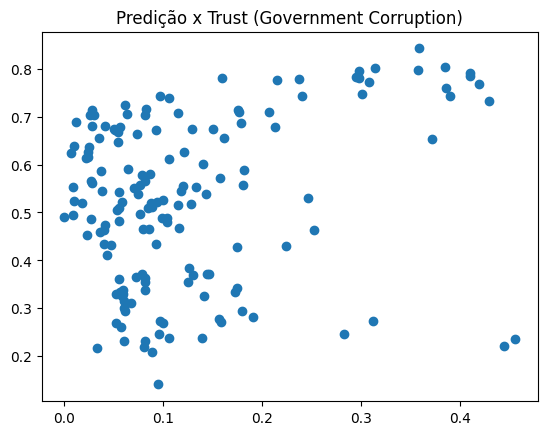

In [84]:
plt.scatter(x_test.values[:,0], y_pred)
plt.title(f'Predição x {x_test.columns[0]}')

Text(0.5, 1.0, 'Predição x GPD Normalized')

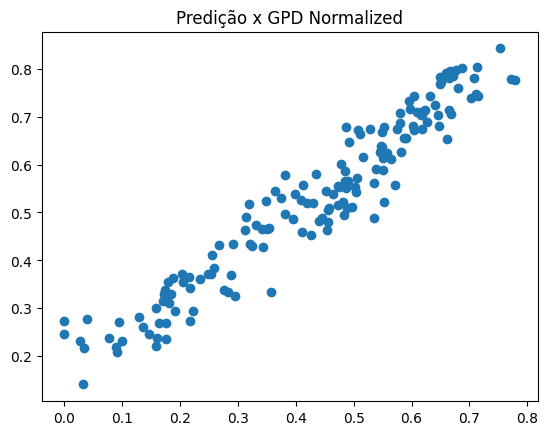

In [85]:
plt.scatter(x_test.values[:,1], y_pred)
plt.title(f'Predição x {x_test.columns[1]}')

Text(0.5, 1.0, 'Predição x Happiness Normalized')

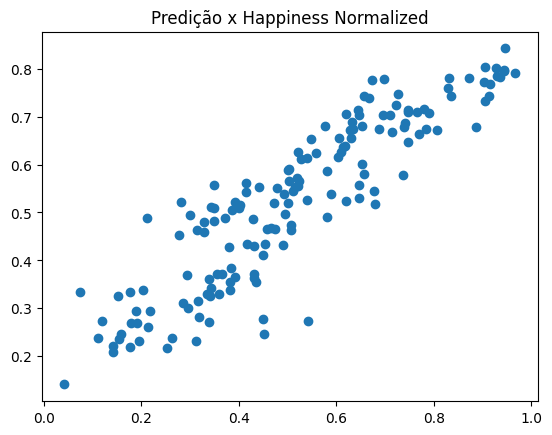

In [86]:
plt.scatter(x_test.values[:,2], y_pred)
plt.title(f'Predição x {x_test.columns[2]}')

In [87]:
# Avaliando métricas do modelo

print(' Métricas do modelo '.center(75, '='))
print('\nMAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_SCORE: ', metrics.r2_score(y_test, y_pred))

============================ Métricas do modelo ===========================

MAE:  0.10138982321071434
MSE:  0.01610939474232807
RMSE:  0.12692279047644703
R2_SCORE:  0.6722651337724221


##Análise de resíduos

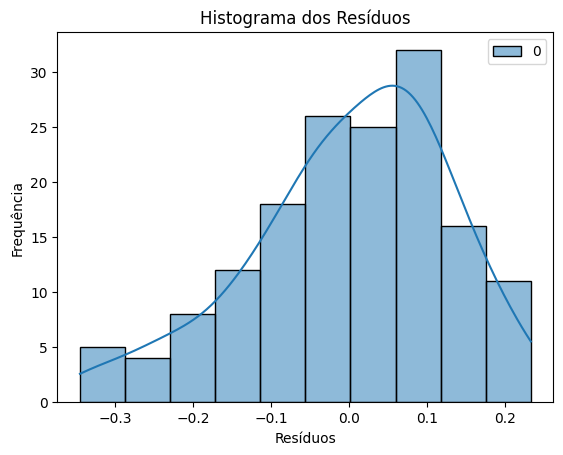

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.stattools import durbin_watson


# Resíduos
residuals = y_test - y_pred


# Histograma dos resíduos
sns.histplot(residuals, kde=True)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Histograma dos Resíduos")
plt.show()


